# GridPath Workshop (UCSB)

Initialization

In [1]:
import os
import sys
import pandas as pd

# Print the current working directory. The result should end with state_model
software_dir = os.getcwd()
os.chdir("..")
print(software_dir)

/Users/Guille/Desktop/state_model/gridpath-workshop-ucsb


In [2]:
#Setting this as the primary directory for all future use
# This is be the main folder where all files are created and stored in. 
directory = os.getcwd()
print(directory)

/Users/Guille/Desktop/state_model


In [3]:
# Defining the database directory - where the database file will be created and stored. 
db_dir = f"{directory}/db"

# Defining CSV inputs directory - where the state level input files are stored. 
csv_dir = f"{directory}/input_csvs_gridpath"

#Defining scenario folder location
scen_dir = f"{directory}/scenarios"

# GridPath: Production Cost
The following section is for running a production cost model in GridPath.

## User edit section
Add the folder name with input csvs and provide a name for this database.

In [4]:
# Speciific  model for this run.
# Add the name of the specific mode folder file by replacing the worth between " " 
input_csvs_gridpath = "TN_2030-12-4_production"

# Add your database name below between "" or leave blank to use input_csvs_gridpath as database name
db_name = ""
db_name = db_name if db_name else input_csvs_gridpath
print(f"Database name is set to: {db_name}")

Database name is set to: TN_2030-12-4_production


## Creating database, importing state inputs and importing scenarios to the database for modeling

In [5]:
!python {directory}/gridpath/db/create_database.py --database {db_dir}/{db_name}.db
!python {directory}/gridpath/db/utilities/port_csvs_to_db.py --database {db_dir}/{db_name}.db --csv_location {csv_dir}/{input_csvs_gridpath}
!python {directory}/gridpath/db/utilities/scenario.py --database {db_dir}/{db_name}.db --csv_path {csv_dir}/{input_csvs_gridpath}/scenarios.csv

Importing data for subscenario solver_options_id, table options_solver from /Users/Guille/Desktop/state_model/input_csvs_gridpath/TN_2030-12-4_production/solver...
...importing CSV 4_gurobi_4th_high_mipgap.csv
   ...importing data from 4_gurobi_4th_high_mipgap.csv
...importing CSV 1_glpk.csv
   ...importing data from 1_glpk.csv
...importing CSV 5_ipopt.csv
   ...importing data from 5_ipopt.csv
...importing CSV 3_cplex_high_mipgap.csv
   ...importing data from 3_cplex_high_mipgap.csv
...importing CSV 6_highs.csv
   ...importing data from 6_highs.csv
...importing CSV 2_cbc.csv
   ...importing data from 2_cbc.csv
Importing data for subscenario temporal_scenario_id, table temporal from /Users/Guille/Desktop/state_model/input_csvs_gridpath/TN_2030-12-4_production/temporal...
...importing data from directory /Users/Guille/Desktop/state_model/input_csvs_gridpath/TN_2030-12-4_production/temporal/1_12steps_2030_hourly_timepoints
   ...importing data from nan
Importing data for subscenario tempo

In [6]:
# This will print out all possible scenarios available
scenario_csv = pd.read_csv(f"{csv_dir}/{input_csvs_gridpath}/scenarios.csv")
column_names = scenario_csv.columns[1:]

# Print scenario names
print("Available scenarios:")
for name in column_names:
    print(name)

Available scenarios:
BAU_TN_2030-12-4_production


## Select scenarios from the list above and add to the `selected_scenario` below before running.

### User Edit Section

In [7]:
# Add or remove scenarios from above to the list below:
scen_list = ["BAU_TN_2030-12-4_production"]

### Running selected scenarios

In [8]:
for selected_scenario in scen_list:
    !python {directory}/gridpath/gridpath/run_end_to_end.py --database {db_dir}/{db_name}.db --scenario {selected_scenario} --scenario_location {scen_dir}

Running scenario BAU_TN_2030-12-4_production end to end
Process ID is 1766
End-to-end run started on 2024-10-31 11:29:47.726711
Getting inputs... (connected to database /Users/Guille/Desktop/state_model/db/TN_2030-12-4_production.db)

Running optimization for scenario BAU_TN_2030-12-4_production
--- subproblem 1
Building model...
Loading data...
Creating problem instance...
ERROR: Constructing component 'stor_spec_fixed_cost_per_mwh_yr' from
    data={('BESS_4_hr_Exo', 2030): 0.0, ('Pumped_Storage_HEP', 2030): nan}
    failed:
        RuntimeError: Failed to set value for
        param=stor_spec_fixed_cost_per_mwh_yr, index=('Pumped_Storage_HEP',
        2030), value=nan.
    	source error message=Invalid parameter value:
    	stor_spec_fixed_cost_per_mwh_yr[('Pumped_Storage_HEP', 2030)] = 'nan',
    	value type=<class 'float'>. Value not in parameter domain
    	NonNegativeReals
ERROR:root:Failed to set value for param=stor_spec_fixed_cost_per_mwh_yr, index=('Pumped_Storage_HEP', 2030

# Visualization: Production Cost
The following section is for visualizing the results from the GridPath Production Cost model above.

In [10]:
# Checking the directory is correct - should be state_model folder
os.chdir(software_dir)
print(os.getcwd())

/Users/Guille/Desktop/state_model/gridpath-workshop-ucsb


In [11]:
# loading packages and setting results folder
from loading_utils import * 
from plotting_utils import * 
from processing_utils import * 

path_to_scenarios = f"{directory}/scenarios"
print(path_to_scenarios)

/Users/Guille/Desktop/state_model/scenarios


Loading necessary functions for the zones, scenarios labels `<scenario_labels.csv>` and technology colors `<technology_labels.csv>` to plot the graph for new and existing capacity

In [12]:
scen_labels_     = pd.read_csv(directory + '/input_csvs_plotting/scenario_labels_production.csv') 
tech_labels_     = pd.read_csv(directory + '/input_csvs_plotting/technology_labels_production.csv') 
dispatch_labels_ = pd.read_csv(directory + '/input_csvs_plotting/dispatch_labels_production.csv') 

Load new and existing capacity across different scenarios, grouping the capacity by technology.

In [13]:
capacity_         = _load_capacity_production(scen_labels_, path_to_scenarios)
grouped_capacity_ = _group_capacity_technologies(capacity_, tech_labels_)
grouped_capacity_.style

BAU_TN_2030-12-4_production


,Scenario,Period,Technology,Zone,Status,Power,Energy
0,BAU_TN_2030-12-4_production,2030,Battery,TANGEDCO,new,0.000000,0.000000
1,BAU_TN_2030-12-4_production,2030,Coal,TANGEDCO,new,14000.000000,0.000000
2,BAU_TN_2030-12-4_production,2030,Curtailment,TANGEDCO,new,0.000000,0.000000
3,BAU_TN_2030-12-4_production,2030,Gas,TANGEDCO,new,1000.000000,0.000000
4,BAU_TN_2030-12-4_production,2030,Hydro,TANGEDCO,new,5000.000000,0.000000
5,BAU_TN_2030-12-4_production,2030,Import,TANGEDCO,new,34000.000000,0.000000
6,BAU_TN_2030-12-4_production,2030,Nuclear,TANGEDCO,new,600.000000,0.000000
7,BAU_TN_2030-12-4_production,2030,Other,TANGEDCO,new,356.000000,0.000000
8,BAU_TN_2030-12-4_production,2030,Pumped Storage,TANGEDCO,new,0.000000,0.000000
9,BAU_TN_2030-12-4_production,2030,Shedding,TANGEDCO,new,0.000000,0.000000


Plotting the new and existing capacity across different scenarios. Add title name for the plot.

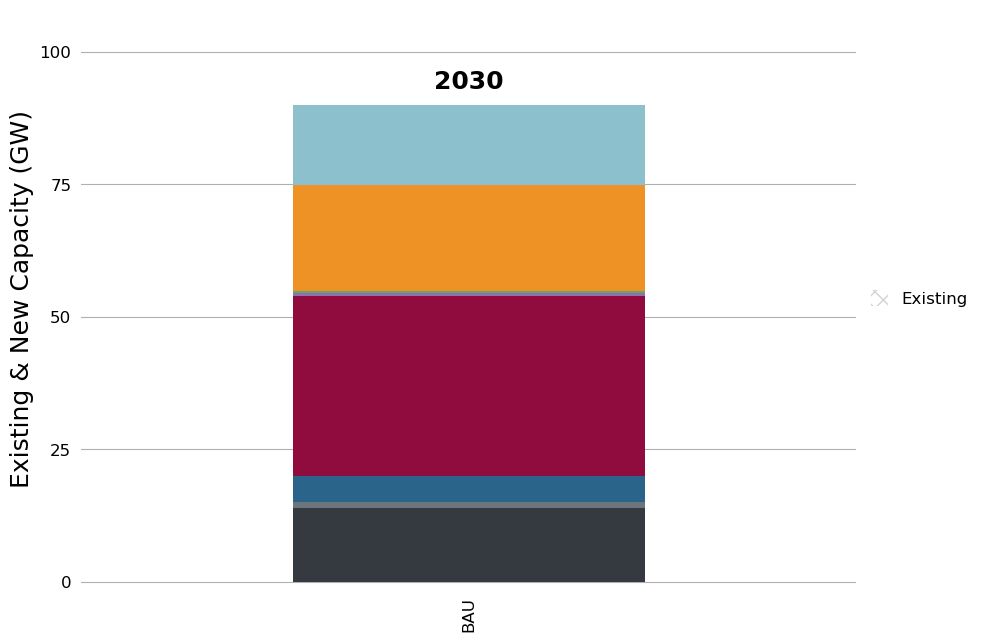

In [14]:
_plot_new_and_existing_capacity(grouped_capacity_, scen_labels_, tech_labels_,
                                units        = 1e3,
                                units_label  = 'Existing & New Capacity (GW)',
                                legend       = True,
                                save         = True,
                                y_grid_inc   = 25,
                                title        = '',
                                file_name    = directory + r'/plots/group_installed_capacity.png')

Energy dispatch by scenarios, zone and date

In [15]:
# Plot energy dispatch for a given day
_plot_zone_energy_dispatch_production(ed_, scen_labels_, tech_labels_, dispatch_labels_,
                                      save      = True,
                                      legend    = True,
                                      file_name = directory + r'/plots/energy_dispatch.png')

NameError: name 'ed_' is not defined

In [16]:
ed_ = _processing_energy_dispatch_production(scen_labels_, path_to_scenarios)
ed_ = _group_dispatch_technologies_by_zone_and_date_production(ed_, tech_labels_)
print(ed_)

BAU_TN_2030-12-4_production
      load_zone technology                     scenario  timepoint  \
0      TANGEDCO       Coal  BAU_TN_2030-12-4_production  203000101   
1      TANGEDCO       Coal  BAU_TN_2030-12-4_production  203000102   
2      TANGEDCO       Coal  BAU_TN_2030-12-4_production  203000103   
3      TANGEDCO       Coal  BAU_TN_2030-12-4_production  203000104   
4      TANGEDCO       Coal  BAU_TN_2030-12-4_production  203000105   
...         ...        ...                          ...        ...   
10363  TANGEDCO       Wind  BAU_TN_2030-12-4_production  203033592   
10364  TANGEDCO       Wind  BAU_TN_2030-12-4_production  203033593   
10365  TANGEDCO       Wind  BAU_TN_2030-12-4_production  203033594   
10366  TANGEDCO       Wind  BAU_TN_2030-12-4_production  203033595   
10367  TANGEDCO       Wind  BAU_TN_2030-12-4_production  203033596   

          power_mw  
0      6312.952879  
1      6290.752450  
2      6189.732013  
3      6127.669230  
4      6083.265886  
...  

Load energy dispatch across scenarios and group the energy dispatch by technology

In [17]:
import numpy as np
import pandas as pd

# Grab data from databases for plotting energy dispatch and clean energy targets
def _load_energy_dispatch_production(scen_labels_, path):

    # Load energy dispatch table and process data from database
    def __load_ed_from_csv(ed_, zones_, scenario):
        
        periods_  = ed_['period'].unique()
        techs_    = ed_['technology'].unique()
        dispatch_ = []
        for tech, i_tech in zip(techs_, range(len(techs_))):
            for period, i_period in zip(periods_, range(len(periods_))):
                for zone, i_zone in zip(zones_, range(len(zones_))):
                    # Find specific row from database 
                    if zone == 'all_nodes':
                        idx_ = (ed_['period'] == period) & (ed_['technology'] == tech)
                    else:
                        idx_ = (ed_['period'] == period) & (ed_['technology'] == tech) & (ed_['load_zone'] == zone)
                                                
                    dispatch_ += [[scenario, 
                                   period, 
                                   tech, 
                                   zone, 
                                   np.sum(ed_.loc[idx_, 'number_of_hours_in_timepoint']*ed_.loc[idx_, 'timepoint_weight']*ed_.loc[idx_, 'power_mw'])]]

        return pd.DataFrame(np.array(dispatch_), columns = ['Scenario', 'Period', 'Technology', 'Zone', 'Energy'])

    # Load energy dispatch table and process data from database
    def __load_demand_from_csv(table_, zones_, scenario):
        
        periods_ = table_['period'].unique()
        demand_  = []
        for period, i_period in zip(periods_, range(len(periods_))):
            for zone, i_zone in zip(zones_, range(len(zones_))):
                # Find specific row from database 
                if zone == 'all_nodes':
                    idx_ = (table_['period'] == period)
                else:
                    idx_ = (table_['period'] == period) & (table_['load_zone'] == zone)

                demand_ += [[scenario, 
                             period, 
                             'Shedding', 
                             zone, 
                             np.sum(table_.loc[idx_, 'number_of_hours_in_timepoint']*table_.loc[idx_, 'timepoint_weight']*table_.loc[idx_, 'unserved_energy_mw'])]]

                demand_ += [[scenario, 
                             period, 
                             'Curtailment', 
                             zone, 
                             np.sum(table_.loc[idx_, 'number_of_hours_in_timepoint']*table_.loc[idx_, 'timepoint_weight']*table_.loc[idx_, 'overgeneration_mw'])]]

        return pd.DataFrame(np.array(demand_), columns = ['Scenario', 'Period', 'Technology', 'Zone', 'Energy'])

    scenarios_ = scen_labels_['scenario'].unique()
    zones_     = scen_labels_['zone'].unique()
    dfs_       = []
    # Open connection: open database and grab meta-data
    for scenario in scenarios_:
        print(scenario)
        dir_name = r'{}/{}'.format(path, scenario)

        ed_ = []
        demand_ = []
        for folder in next(os.walk(dir_name))[1]:
            ed_.append(pd.read_csv(dir_name + f'/{folder}/results/project_timepoint.csv'))
            demand_.append(pd.read_csv(dir_name + f'/{folder}/results/system_load_zone_timepoint.csv', low_memory = False))

        ed_ = pd.concat(ed_, axis = 0).reset_index(drop = True)
        demand_ = pd.concat(demand_, axis = 0).reset_index(drop = True)

        dfs_ += [__load_ed_from_csv(ed_, zones_, scenario)]
        dfs_ += [__load_demand_from_csv(demand_, zones_, scenario)]

    dfs_           = pd.concat(dfs_, axis = 0).reset_index(drop = True)
    dfs_['Energy'] = dfs_['Energy'].astype(float)

    return dfs_

def _group_dispatch_technologies(dispatch_, tech_labels_):

    def __agg(df_, row_, x_):
        idx_                    = df_['Technology'].isin(x_)
        row_                   += [df_.loc[idx_, 'Energy'].sum()]
        df_                     = df_.drop(df_.index.values[idx_])
        df_                     = df_.reset_index(drop = True)
        df_.loc[len(df_.index)] = row_
        return df_

    groups_ = tech_labels_['group'].unique()
    dfs_    = []
    for scen in dispatch_['Scenario'].unique():
        for period in dispatch_['Period'].unique():
            for zone in dispatch_['Zone'].unique():
                df_ = dispatch_.loc[ (dispatch_['Scenario'] == scen) & (dispatch_['Period'] == period) & (dispatch_['Zone'] == zone)]
                for group in groups_:
                    techs_ = tech_labels_.loc[tech_labels_['group'] == group, 'technology'].to_list()
                    df_    = __agg(df_, [scen, period, group, zone], techs_)
                dfs_.append(df_) 
                
    dfs_           = pd.concat(dfs_).reset_index(drop = True)
    dfs_['Energy'] = dfs_['Energy'].astype(float)
    return dfs_


dispatch_         = _load_energy_dispatch_production(scen_labels_, path_to_scenarios)
grouped_dispatch_ = _group_dispatch_technologies(dispatch_, tech_labels_)
grouped_dispatch_.style


BAU_TN_2030-12-4_production


,Scenario,Period,Technology,Zone,Energy
0,BAU_TN_2030-12-4_production,2030,Coal,TANGEDCO,82788388.791173
1,BAU_TN_2030-12-4_production,2030,Gas,TANGEDCO,7112286.750000
2,BAU_TN_2030-12-4_production,2030,Import,TANGEDCO,14412000.000000
3,BAU_TN_2030-12-4_production,2030,Hydro,TANGEDCO,18540381.094749
4,BAU_TN_2030-12-4_production,2030,Other,TANGEDCO,687953.451058
5,BAU_TN_2030-12-4_production,2030,Battery,TANGEDCO,0.000000
6,BAU_TN_2030-12-4_production,2030,Nuclear,TANGEDCO,4377600.000000
7,BAU_TN_2030-12-4_production,2030,Pumped Storage,TANGEDCO,0.000000
8,BAU_TN_2030-12-4_production,2030,Solar,TANGEDCO,17936065.190845
9,BAU_TN_2030-12-4_production,2030,Wind,TANGEDCO,22074698.212549


Plotting energy dispatch per technology for different scenarios

/Users/Guille/Desktop/state_model/gridpath-workshop-ucsb/plotting_utils.py:633: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(loc            = 'center left',


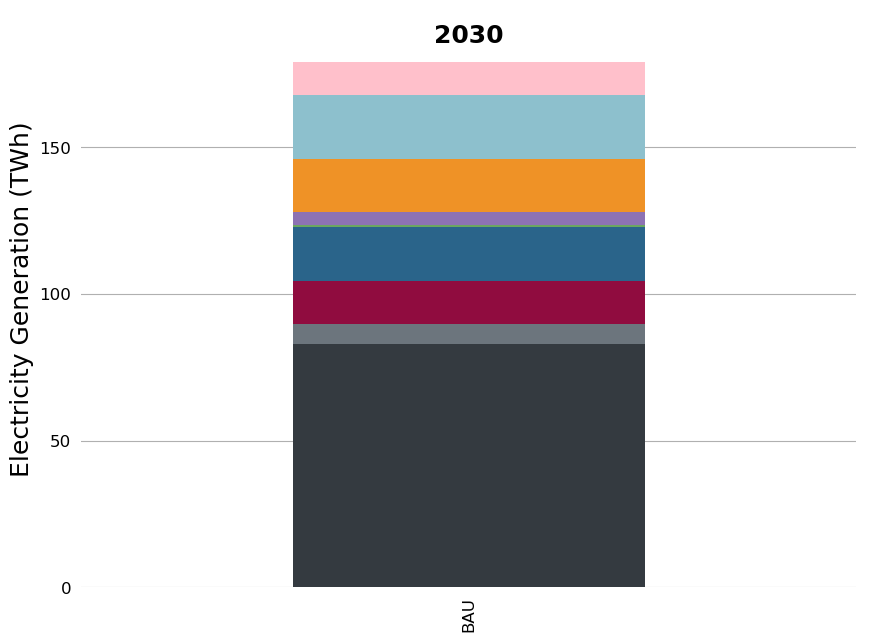

In [18]:
# Enter a title of your choice between the quotation marks ('') under title = ''.
_plot_dispatch(grouped_dispatch_, scen_labels_,  tech_labels_, 
               units        = 1e6, 
               units_label  = r'Electricity Generation (TWh)',
               save         = True,
               legend       = True,
               y_grid_inc   = 50,
               title        = '',
               file_name    = directory + r'/plots/group_electricity_generation.png')

Load Greenhouse Gas (GHG) emissions and load energy demand for different scenarios

In [19]:
import numpy as np

# Grab data from databases for plotting GHG emissions
def _load_GHG_emissions(scen_labels_, path):

    # Load GHG emissions table and process them from database
    def __load_GHG_from_csv(ed_, zones_, scenario):

        periods_   = ed_['period'].unique()
        techs_     = ed_['technology'].unique()
        emissions_ = []
        for tech, i_tech in zip(techs_, range(len(techs_))):
            for period, i_period in zip(periods_, range(len(periods_))):
                for zone, i_zone in zip(zones_, range(len(zones_))):
                    # Find specific row from database
                    if zone == 'all_nodes': idx_ = (ed_['period'] == period) & (ed_['technology'] == tech)
                    else:                   idx_ = (ed_['period'] == period) & (ed_['technology'] == tech) & (ed_['load_zone'] == zone)

                    emissions_ += [[scenario,
                                    period,
                                    tech,
                                    zone,
                                    np.sum(ed_.loc[idx_, 'number_of_hours_in_timepoint']*ed_.loc[idx_, 'timepoint_weight']*ed_.loc[idx_, 'carbon_emissions_tons'])]]

        return pd.DataFrame(np.array(emissions_), columns = ['Scenario', 'Period', 'Technology', 'Zone', 'GHG']).sort_values(by = ['Scenario', 'Period', 'Technology', 'Zone']).reset_index(drop = True)

    # Load energy dispatch table and process data from database
    def __load_demand_from_csv(demand_table_, timepoints_table_, zones_, scenario):
        periods_ = timepoints_table_['period'].unique()
        demand_  = []
        for period, i_period in zip(periods_, range(len(periods_))):
            for zone, i_zone in zip(zones_, range(len(zones_))):
                # Find specific row from database
                idx_ = timepoints_table_['period'] == period

                if zone == 'all_nodes':
                    state_demand_              = demand_table_.groupby('timepoint').agg({'load_mw': 'sum'})
                    state_demand_['timepoint'] = state_demand_.index
                    state_demand_              = state_demand_.reset_index(drop = True)
                else:
                    state_demand_ = demand_table_.loc[demand_table_['LOAD_ZONES'] == zone].reset_index(drop = True)

                demand_ += [[scenario,
                             period,
                             zone,
                             np.sum(timepoints_table_.loc[idx_, 'number_of_hours_in_timepoint']*state_demand_.loc[idx_, 'load_mw']*timepoints_table_.loc[idx_, 'timepoint_weight'])]]

        return pd.DataFrame(np.array(demand_), columns = ['Scenario', 'Period', 'Zone', 'Load'])

    # Open connection: open database and grab meta-data
    dfs_     = []
    demands_ = []
    scenarios_ = scen_labels_['scenario'].to_list()
    zones_     = scen_labels_['zone'].to_list()

    for scen, i_scen in zip(scenarios_, range(len(scenarios_))):
        print(scen)
        dir_name = r'{}/{}'.format(path, scen)

        ed_         = []
        demand_     = []
        timepoints_ = []
        for folder in next(os.walk(dir_name))[1]:
            ed_.append(pd.read_csv(dir_name + f'/{folder}/results/project_timepoint.csv'))
            demand_.append(pd.read_csv(dir_name + f'/{folder}/inputs/load_mw.tab', sep = '\t', engine = 'python'))
            timepoints_.append(pd.read_csv(dir_name + f'/{folder}/inputs/timepoints.tab', sep = '\t', engine = 'python'))
        ed_         = pd.concat(ed_, axis = 0).reset_index(drop = True)
        demand_     = pd.concat(demand_, axis = 0).reset_index(drop = True)
        timepoints_ = pd.concat(timepoints_, axis = 0).reset_index(drop = True)

        # Load GHG emissions from cvs files
        zone              = [zones_[i_scen]]
        emissions_        = __load_GHG_from_csv(ed_, zone, scen)
        emissions_['GHG'] = emissions_['GHG'].astype(float)

        # Load energy demand from csv files
        demand_ = __load_demand_from_csv(demand_, timepoints_, zone, scen)
        demand_['Load'] = demand_['Load'].astype(float)

        dfs_.append(emissions_)
        demands_.append(demand_)

    return pd.concat(dfs_, axis = 0).reset_index(drop = True), pd.concat(demands_, axis = 0).reset_index(drop = True)



emissions_, demand_ = _load_GHG_emissions(scen_labels_, path_to_scenarios)
emissions_.style



BAU_TN_2030-12-4_production
        project  timepoint  period  horizon capacity_type availability_type  \
0       Biomass  203024501    2030  2030245      gen_spec         exogenous   
1       Biomass  203024502    2030  2030245      gen_spec         exogenous   
2       Biomass  203024503    2030  2030245      gen_spec         exogenous   
3       Biomass  203024504    2030  2030245      gen_spec         exogenous   
4       Biomass  203024505    2030  2030245      gen_spec         exogenous   
...         ...        ...     ...      ...           ...               ...   
11515  Windmill  203012392    2030  2030123      gen_spec         exogenous   
11516  Windmill  203012393    2030  2030123      gen_spec         exogenous   
11517  Windmill  203012394    2030  2030123      gen_spec         exogenous   
11518  Windmill  203012395    2030  2030123      gen_spec         exogenous   
11519  Windmill  203012396    2030  2030123      gen_spec         exogenous   

      operational_type 

,Scenario,Period,Technology,Zone,GHG
0,BAU_TN_2030-12-4_production,2030,Bagasse,TANGEDCO,0.000000
1,BAU_TN_2030-12-4_production,2030,Central_Coal,TANGEDCO,0.000000
2,BAU_TN_2030-12-4_production,2030,Genco_Coal,TANGEDCO,0.000000
3,BAU_TN_2030-12-4_production,2030,Genco_Gas,TANGEDCO,0.000000
4,BAU_TN_2030-12-4_production,2030,Genco_Hydro,TANGEDCO,0.000000
5,BAU_TN_2030-12-4_production,2030,Market_FlexibleGen,TANGEDCO,0.000000
6,BAU_TN_2030-12-4_production,2030,Nuclear,TANGEDCO,0.000000
7,BAU_TN_2030-12-4_production,2030,Solar,TANGEDCO,0.000000
8,BAU_TN_2030-12-4_production,2030,Wind,TANGEDCO,0.000000


Plot GHG emissions for different scenarios

/Users/Guille/Desktop/state_model/gridpath-workshop-ucsb/plotting_utils.py:256: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set_ylim(df_['GHG'].min()*.9/units,df_['GHG'].max()*1.1/units)


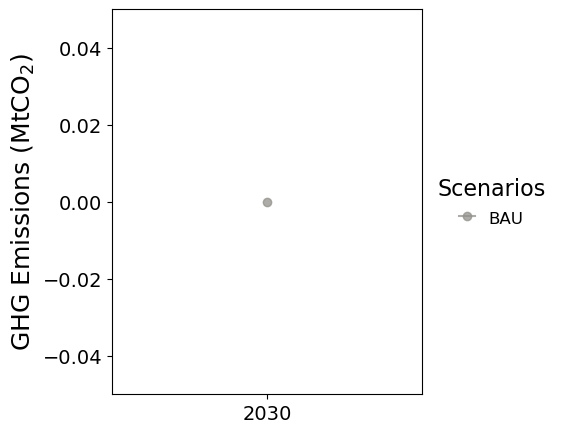

In [20]:
# Enter a title of your choice between the quotation marks ('') under title = ''.
_plot_emissions(emissions_, scen_labels_, 
                units      = 1e6,
                unit_label = r'GHG Emissions (MtCO$_2$)',
                save       = True,
                legend     = True,
                title      = '',
                file_name  = directory + r'/plots/GHG_emissions.png')

Processing GHG emissions intensity for different scenarios

In [21]:
def _GHG_emissions_intensity(emissions_, demands_):
    emissions_ = emissions_.drop(columns = ['Technology'])
    emissions_ = emissions_.groupby(['Scenario', 'Zone', 'Period'], as_index = False).sum()

    emissions_['Load'] = 0.
    for scen in emissions_['Scenario'].unique():
        print(scen)
        for zone in emissions_['Zone'].unique():
            for period in emissions_['Period'].unique():
                idx_1_ = (demands_['Scenario'] == scen) & (demands_['Zone'] == zone) & (demands_['Period'] == period)
                idx_2_ = (emissions_['Scenario'] == scen) & (emissions_['Zone'] == zone) & (emissions_['Period'] == period)

                emissions_.loc[idx_2_, 'Load'] = float(demands_.loc[idx_1_, 'Load'].to_numpy()[0])

        emissions_['Load'] = emissions_['Load'].astype(float)
    emissions_['Intensity'] = emissions_['GHG']/emissions_['Load']
    return emissions_.sort_values(by = ['Scenario', 'Period', 'Zone']).reset_index(drop = True), demands_

intesity_, demand_ = _GHG_emissions_intensity(emissions_, demand_)
intesity_.style

BAU_TN_2030-12-4_production


,Scenario,Zone,Period,GHG,Load,Intensity
0,BAU_TN_2030-12-4_production,TANGEDCO,2030,0.000000,178982374.900000,0.000000


Plot GHG emissions intensity for different scenarios

/Users/Guille/Desktop/state_model/gridpath-workshop-ucsb/plotting_utils.py:420: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set_ylim(df_['Intensity'].min()*0.9, df_['Intensity'].max()*1.1)


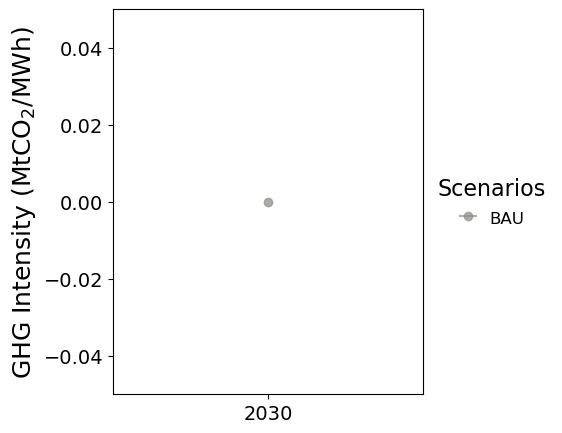

In [22]:
# Enter a title of your choice between the quotation marks ('') under title = ''.
_plot_emissions_intensity(intesity_, scen_labels_, 
                          unit_label = r'GHG Intensity (MtCO$_2$/MWh)',
                          save       = True,
                          legend     = True,
                          title      = '',
                          file_name  = directory + r'/plots/GHG_emissions_intensity.png')

Load system cost data for different scenarios

In [30]:

# Grab data from databases for plotting LCOE emissions
def _load_system_cost(scen_labels_, path):
    # Load fuel, and operation and maintanace cost table and process data from database
    def __load_vr_cost_from_csv(table_, zones_, scenario):
        periods_ = table_['period'].unique()
        vr_cost_ = []
        for period, i_period in zip(periods_, range(len(periods_))):
            for zone, i_zone in zip(zones_, range(len(zones_))):
                # Find specific row from database
                if zone == 'all_nodes': idx_ = table_['period'] == period
                else:               idx_ = (table_['period'] == period) & (table_['load_zone'] == zone)

                vr_cost_ += [[scenario,
                              period,
                              zone,
                              np.sum(table_.loc[idx_, 'number_of_hours_in_timepoint']*table_.loc[idx_, 'timepoint_weight']*table_.loc[idx_, 'variable_om_cost'])]]

        return pd.DataFrame(np.array(vr_cost_), columns = ['Scenario', 'Period', 'Zone', 'Variable_Costs']).sort_values(by = ['Scenario', 'Period', 'Zone']).reset_index(drop = True)

    # Load fix capacity cost table and process data from database
    def __load_fx_cost_from_csv(table_, zones_, scenario):
        periods_ = table_['period'].unique()
        fx_cost_ = []
        for period, i_period in zip(periods_, range(len(periods_))):
            for zone, i_zone in zip(zones_, range(len(zones_))):
                # Find specific row from database
                if zone == 'all_nodes': 
                    idx_ = table_['period'] == period
                else:                   
                    idx_ = (table_['period'] == period) & (table_['load_zone'] == zone)

                fx_cost_ += [[scenario,
                              period,
                              zone,
                              np.sum(table_.loc[idx_, 'capacity_cost']) + np.sum(table_.loc[idx_, 'fixed_cost'])]]

        return pd.DataFrame(np.array(fx_cost_), columns = ['Scenario', 'Period', 'Zone', 'Fix_Costs'])

    # Load transmission capacity cost table and process data from database
    def __load_tx_cost_from_csv(table_, zones_, scenario):
        periods_ = table_['period'].unique()
        tx_cost_ = []
        for period, i_period in zip(periods_, range(len(periods_))):
            for zone, i_zone in zip(zones_, range(len(zones_))):
                # Find specific row from database
                if zone == 'all_nodes': 
                    idx_ = table_['period'] == period
                else:                   
                    idx_ = (table_['period'] == period) & (table_['load_zone_to'] == zone)

                tx_cost_ += [[scenario,
                              period,
                              zone,
                              np.sum(table_.loc[idx_, 'capacity_cost']) + np.sum(table_.loc[idx_, 'fixed_cost'])]]

        return pd.DataFrame(np.array(tx_cost_), columns = ['Scenario', 'Period', 'Zone', 'Tx_Costs'])

    # Load energy dispatch table and process data from database
    def __load_demand_from_csv(demand_table_, timepoints_table_, zones_, scenario):
        periods_ = timepoints_table_['period'].unique()
        demand_  = []
        for period, i_period in zip(periods_, range(len(periods_))):
            for zone, i_zone in zip(zones_, range(len(zones_))):
                # Find specific row from database
                idx_ = timepoints_table_['period'] == period
                if zone == 'all_nodes':
                    state_demand_              = demand_table_.groupby('timepoint').agg({'load_mw': 'sum'})
                    state_demand_['timepoint'] = state_demand_.index
                    state_demand_              = state_demand_.reset_index(drop = True)
                else:
                    state_demand_ = demand_table_.loc[demand_table_['LOAD_ZONES'] == zone].reset_index(drop = True)

                demand_ += [[scenario,
                             period,
                             zone,
                             np.sum(timepoints_table_.loc[idx_, 'number_of_hours_in_timepoint']*state_demand_.loc[idx_, 'load_mw']*timepoints_table_.loc[idx_, 'timepoint_weight'])]]

        return pd.DataFrame(np.array(demand_), columns = ['Scenario', 'Period', 'Zone', 'Load'])

    scenarios_ = scen_labels_['scenario'].to_list()
    zones_     = scen_labels_['zone'].to_list()

    dfs_ = []
    # Open connection: open database and grab meta-data
    for scen, i_scen in zip(scenarios_, range(len(scenarios_))):
        print(scen)
        dir_name = r'{}/{}'.format(path, scen)
        
        zone = [zones_[i_scen]]

        fx_table_   = []
        vr_table_   = []
        tx_table_   = []
        demand_     = []
        timepoints_ = []
        for folder in next(os.walk(dir_name))[1]:
            fx_table_.append(pd.read_csv(dir_name + f'/{folder}/results/project_period.csv', low_memory = False))
            vr_table_.append(pd.read_csv(dir_name + f'/{folder}/results/project_timepoint.csv', low_memory = False))
            #tx_table_.append(pd.read_csv(dir_name + f'/{folder}/results/transmission_period.csv', low_memory = False))        
            demand_.append(pd.read_csv(dir_name + f'/{folder}/inputs/load_mw.tab', sep = '\t', engine = 'python'))
            timepoints_.append(pd.read_csv(dir_name + f'/{folder}/inputs/timepoints.tab', sep = '\t', engine = 'python'))
        fx_table_   = pd.concat(fx_table_, axis = 0).reset_index(drop = True)
        vr_table_   = pd.concat(vr_table_, axis = 0).reset_index(drop = True)
        #tx_table_   = pd.concat(tx_table_, axis = 0).reset_index(drop = True)
        demand_     = pd.concat(demand_, axis = 0).reset_index(drop = True)
        timepoints_ = pd.concat(timepoints_, axis = 0).reset_index(drop = True)
        
        # Load energy demand from csv files
        demand_ = __load_demand_from_csv(demand_, timepoints_, zone, scen)
        # Load fix costs from csv files
        fx_cost_ = __load_fx_cost_from_csv(fx_table_, zone, scen)
        # Load variables costs from csv files
        vr_cost_ = __load_vr_cost_from_csv(vr_table_, zone, scen)

        #tx_cost_  = __load_tx_cost_from_csv(tx_table_, zone, scen)

        df_ = pd.merge(vr_cost_, fx_cost_, on = ['Scenario', 'Period', 'Zone'])
        df_ = pd.merge(df_, demand_, on = ['Scenario', 'Period', 'Zone'])
        #df_ = pd.merge(df_, tx_cost_, on = ['Scenario', 'Period', 'Zone'])

        df_['Cost'] = df_['Fix_Costs'].astype(float) + df_['Variable_Costs'].astype(float) #+ df_['Tx_Costs'].astype(float)

        #df_['Cost'] = df_['Tx_Costs'].astype(float)
        df_['Load'] = df_['Load'].astype(float)
        df_['LCOE'] = df_['Cost'].astype(float)/df_['Load'].astype(float)
        dfs_.append(df_)

    return pd.concat(dfs_, axis = 0).reset_index(drop = True)

system_cost_ = _load_system_cost(scen_labels_, path_to_scenarios)
system_cost_.style

BAU_TN_2030-12-4_production


,Scenario,Period,Zone,Variable_Costs,Fix_Costs,Load,Cost,LCOE
0,BAU_TN_2030-12-4_production,2030,TANGEDCO,178992771569.28766,220983253160.0,178982374.900000,399976024729.287659,2234.722972


Plot system Levelized Cosst of Electricity (LCOE) for different scenarios

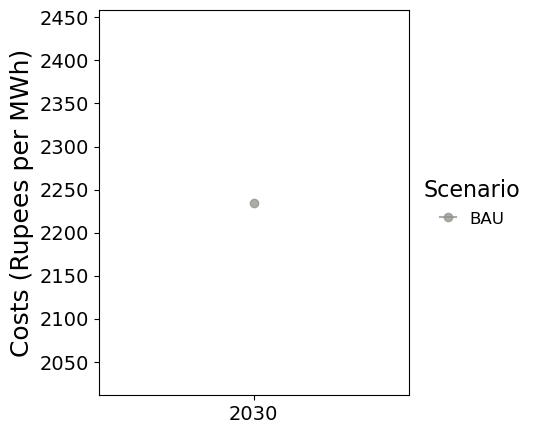

In [31]:
# Enter a title of your choice between the quotation marks ('') under title = ''.
_plot_system_cost(system_cost_, scen_labels_, 
                  unit_label = r'Costs (Rupees per MWh)', 
                  save       = True, 
                  legend     = True,
                  title      = '', 
                  file_name  = directory + r'/plots/system_cost.png')

In [47]:

# User-defined scenario filter (can be left blank for all scenarios)
def _filter_capacity(grouped_capacity_, scenario = '' , status = ''):
    # Apply the scenario and status filters if specified
    if scenario and status:
        filtered_data = grouped_capacity_[
            (grouped_capacity_['Status'] == status) &
            (grouped_capacity_['Scenario'] == scenario)
        ]
    elif scenario:
        filtered_data = grouped_capacity_[
            (grouped_capacity_['Scenario'] == scenario)
        ]
    elif status:
        filtered_data = grouped_capacity_[
            (grouped_capacity_['Status'] == status)
        ]
    else:
        # If neither scenario nor gen_status is specified, no filtering applied
        filtered_data = grouped_capacity_
    
    # Convert to wide format by pivoting
    return filtered_data.pivot_table(index   = 'Technology',
                                     columns = ['Scenario', 'Period'],
                                     values  = 'Power',
                                     aggfunc = 'sum').reset_index(drop = True)

# Replace with a specific scenario if needed, otherwise leave blank
scenario = 'BAU_TN_2030-12-4_production' 
# Replace with 'new' or existing' so only new capacity is shown, otherwise leave blank for new and existing
status = '' 
grouped_capacity_.style

,Scenario,Period,Technology,Zone,Status,Power,Energy
0,BAU_TN_2030-12-4_production,2030,Battery,TANGEDCO,new,0.000000,0.000000
1,BAU_TN_2030-12-4_production,2030,Coal,TANGEDCO,new,14000.000000,0.000000
2,BAU_TN_2030-12-4_production,2030,Curtailment,TANGEDCO,new,0.000000,0.000000
3,BAU_TN_2030-12-4_production,2030,Gas,TANGEDCO,new,1000.000000,0.000000
4,BAU_TN_2030-12-4_production,2030,Hydro,TANGEDCO,new,5000.000000,0.000000
5,BAU_TN_2030-12-4_production,2030,Import,TANGEDCO,new,34000.000000,0.000000
6,BAU_TN_2030-12-4_production,2030,Nuclear,TANGEDCO,new,600.000000,0.000000
7,BAU_TN_2030-12-4_production,2030,Other,TANGEDCO,new,356.000000,0.000000
8,BAU_TN_2030-12-4_production,2030,Pumped Storage,TANGEDCO,new,0.000000,0.000000
9,BAU_TN_2030-12-4_production,2030,Shedding,TANGEDCO,new,0.000000,0.000000
